# TFG in R: propagate

## Data

In [6]:
library("propagate") #llamamos a propagate (instalar el paquete antes)

data_BPT=read.table(".\\DataFrames\\data_frame_BPT.txt") #datos
names(data_BPT)=c("Ha","Ha_Error","Hb","Hb_Error","NII","NII_Error","OIII","OIII_Error") #nombres datos bpt diagram

Ha=data_BPT$Ha #Ha
Ha_Error=data_BPT$Ha_Error #error Ha

Hb=data_BPT$Hb #Hb
Hb_Error=data_BPT$Hb_Error #error Hb

NII=data_BPT$NII #NII
NII_Error=data_BPT$NII_Error #error NII

OIII=data_BPT$OIII #OIII
OIII_Error=data_BPT$OIII_Error #error OIII


## Errors BPT Diagram

[1] 0.04196095

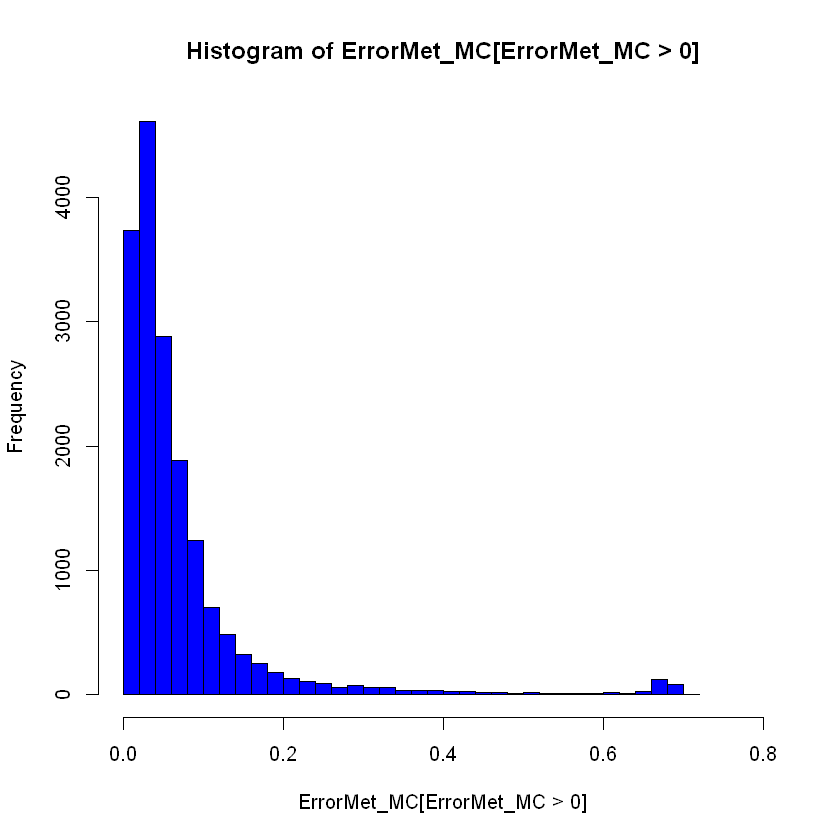

In [2]:
#ERROR PROPAGATE MONTE-CARLO: EJE X DIAGRAMA BPT=0.041994829846394

ErrorMet_MC=vector("numeric")

EXPR1=expression(log10(NII/Ha))

for (i in 1:length(data_BPT$Ha)){
 
    Ha=c(data_BPT$Ha[i],data_BPT$Ha_Error[i])
    NII=c(data_BPT$NII[i],data_BPT$NII_Error[i])

    DF1=makeDat(EXPR1)
 
    RES2=propagate(expr=EXPR1,data=DF1,type="stat",second.order=FALSE,nsim=10000,do.sim=TRUE)
    ErrorMet_MC[i]=ifelse(RES2$sim[2]>0,RES2$sim[2],-9999.0)
}

hist(ErrorMet_MC[ErrorMet_MC>0],xlim=c(0,0.8),breaks=40,col="blue")

median(ErrorMet_MC[ErrorMet_MC>0])

[1] 0.06107488

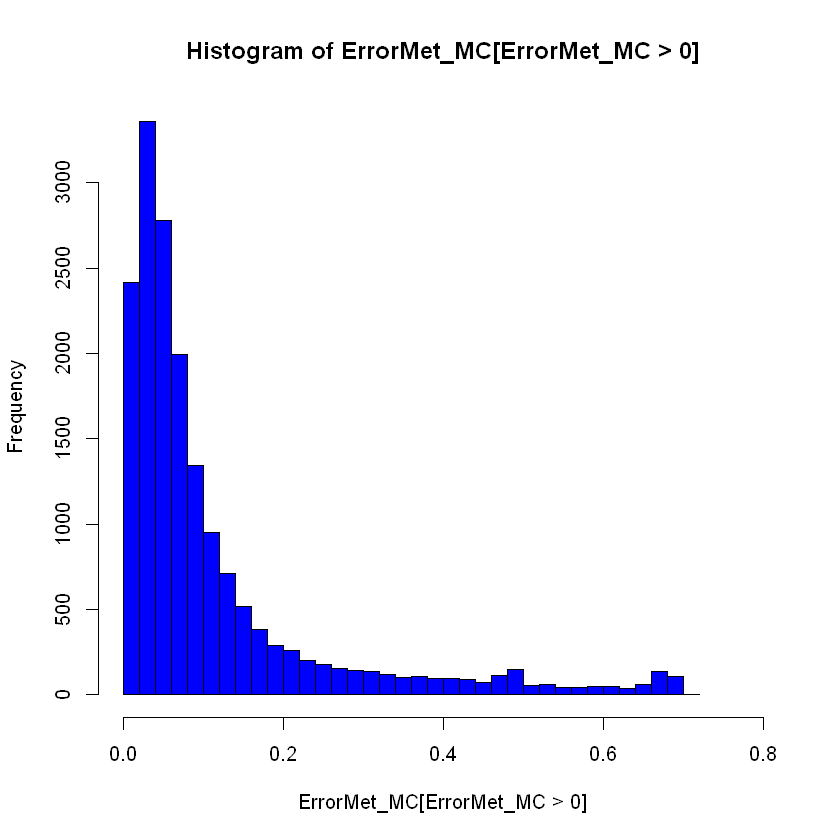

In [3]:
#ERROR PROPAGATE MONTE-CARLO: EJE Y DIAGRAMA BPT=0.0610989829348798

ErrorMet_MC=vector("numeric")

EXPR1=expression(log10(OIII/Hb))

for (i in 1:length(data_BPT$Hb)){
 
    Hb=c(data_BPT$Hb[i],data_BPT$Hb_Error[i])
    OIII=c(data_BPT$OIII[i],data_BPT$OIII_Error[i])

    DF1=makeDat(EXPR1)
 
    RES2=propagate(expr=EXPR1,data=DF1,type="stat",second.order=FALSE,nsim=10000,do.sim=TRUE)
    ErrorMet_MC[i]=ifelse(RES2$sim[2]>0,RES2$sim[2],-9999.0)
}

hist(ErrorMet_MC[ErrorMet_MC>0],xlim=c(0,0.8),breaks=40,col="blue")

median(ErrorMet_MC[ErrorMet_MC>0])

## Errors Metallicities

[1] 0.02521681

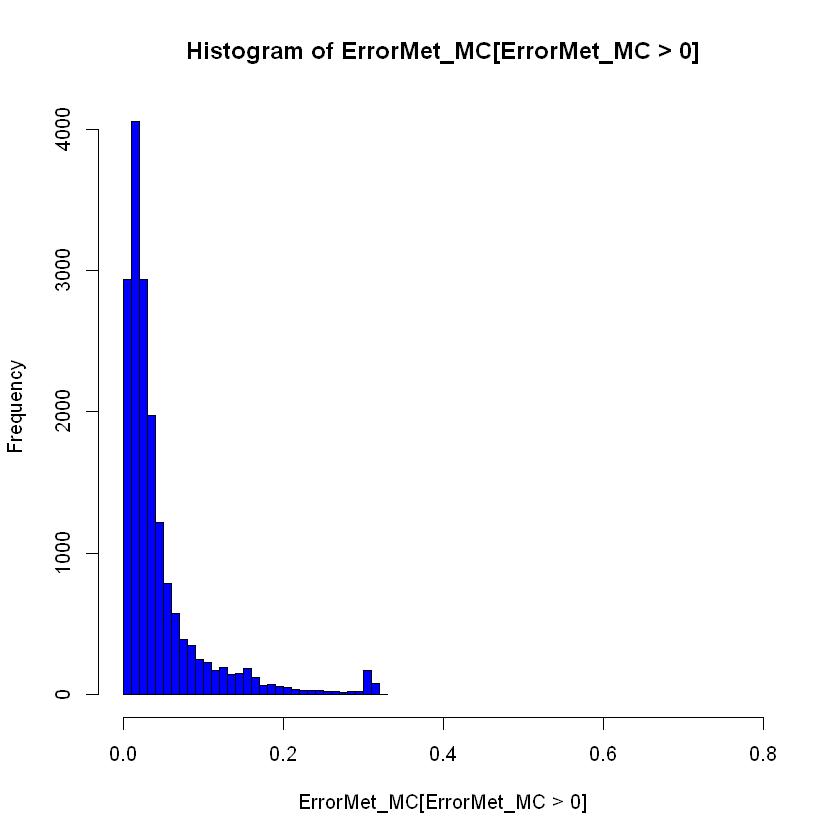

In [4]:
#ERROR PROPAGATE MONTE-CARLO: EJE Y METALICIDADES=0.0252189442516711

ErrorMet_MC=vector("numeric")

EXPR1=expression(8.73-0.32*log10((OIII/Hb)/(NII/Ha)))

for (i in 1:length(data_BPT$Ha)){

    Ha=c(data_BPT$Ha[i],data_BPT$Ha_Error[i])
    Hb=c(data_BPT$Hb[i],data_BPT$Hb_Error[i])
    OIII=c(data_BPT$OIII[i],data_BPT$OIII_Error[i])
    NII=c(data_BPT$NII[i],data_BPT$NII_Error[i])

    DF1=makeDat(EXPR1)
 
    RES2=propagate(expr=EXPR1,data=DF1,type="stat",second.order=FALSE,nsim=10000,do.sim=TRUE)
    ErrorMet_MC[i]=ifelse(RES2$sim[2]>0,RES2$sim[2],-9999.0)
}

hist(ErrorMet_MC[ErrorMet_MC>0],xlim=c(0,0.8),breaks=40,col="blue")

median(ErrorMet_MC[ErrorMet_MC>0])